# Summary:
To compare the movement path variance, `var_p`, across days, I calculate the cumulative movement path variance, `cumuative_var_p`, as the sum of the variance across 100% of the movement: $\int\limits_{0}^{100} Var_p(p) dp$ where $p =$ % movement completed. Then, I plot the cumulative movement path variance for each day.

# What should be in analysis3:
- cumulative_var_ps.npy the cumulative Var[paths] for each day

### imports and plot settings

In [18]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import pickle
import glob # find files in a directory
import re # regex for string parsing

In [19]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.figsize'] = (5, 4)
plt.rcParams["figure.autolayout"] = True

### set `folder_name`

In [20]:
name = "ANA2"

In [21]:
output_folder = "../Data_Copy/AnalysisData/"+name+"/analysis3_"+name+"/"
!mkdir {output_folder}

mkdir: ../Data_Copy/AnalysisData/ANA2/analysis3_ANA2/: File exists


### sort through relevant sorted_analysis2_folders by day ("_d#")

In [22]:
unsorted_analysis2_folders = glob.glob('../Data_Copy/AnalysisData/'+name+'/analysis2_'+name+'_*/')
sorted_analysis2_folders = sorted(unsorted_analysis2_folders, key=lambda x: int(re.search(r'd(.*?)(?:_|$)',x).group()[1]))
sorted_analysis2_folders

['../Data_Copy/AnalysisData/ANA2/analysis2_ANA2_20231101_d6/']

### get `movements_var_ps` and calculate `cumulative_var_p`, $\int\limits_{0}^{100} Var_p(p) dp$ where $p =$ % movement completed. Save to `cumulative_var_ps`, a list of all `cumulative_var_p`'s from all days.

Sticking with num_samples of 10*10000 as explained in analysis2

In [23]:
num_samples = 10*10000

cumulative_var_ps = []
for analysis2_folder in sorted_analysis2_folders:
    var_p = np.load(analysis2_folder+"var_p.npy")

    # Compute the area using the composite trapezoidal rule.
    cumulative_var_p = np.trapz(var_p, dx=(100/num_samples))
    print("cumulative_var_p: ", cumulative_var_p)
    cumulative_var_ps.append(cumulative_var_p)

cumulative_var_ps = np.array(cumulative_var_ps)

cumulative_var_p:  1.2179410812940732


### plot `cumulative_var_p` over days

([<matplotlib.axis.XTick at 0x1786e6610>], [Text(0, 0, '0')])

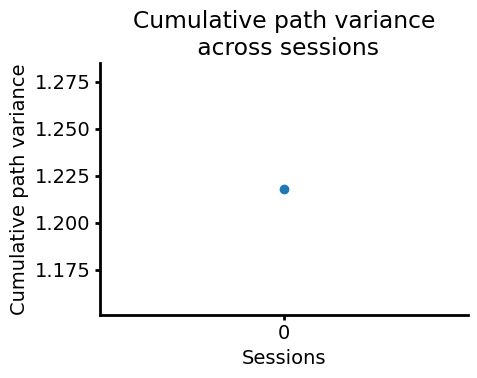

In [24]:
plt.scatter(range(0,len(cumulative_var_ps)),cumulative_var_ps)
plt.title("Cumulative Var[path] \n across sessions")
plt.ylabel("Mean Cumulative Var[path]")
plt.xlabel("Sessions")
plt.xticks(range(0,len(cumulative_var_ps)))

### save `cumulative_var_ps`

In [25]:
np.save(output_folder+"cumulative_var_ps", cumulative_var_ps)